# Data Processing

In [19]:
# Load Libraries
from ipynb.fs.full.functions import box, graphit, cap, outlier_cap
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics, preprocessing
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from functools import reduce

In [20]:
# Load Data 
df_22 = pd.read_csv('data/merged_data.csv')
df_22 = df_22.drop('Unnamed: 0', axis = 1)

In [21]:
# Change Names of Columns 
df_22.rename(columns ={'90s': 'full_90' ,'age':'age', 'Ast_y': 'assists', 
                       'Att 3rd':'touch_3rd', 'Att Pen': 'touch_pen', 'club':'club', 
                    'Cmp_x': 'pass_comp' , 'CrdR_x': 'r_card', 'CrdY_x':'y_card' , 
                       'Crs_x':'crosses'  , 'Drib_3':'drib_goal', 'Fld_5':'foul_goal', 
                       'Fld_y':'fouls_d', 
                       'G-PK':'np_goals', 'Int':'intercept', 'league':'league',
                         'nation': 'nation', 'Off_x':'offside', 'player':'player',
                       'pos':'pos',
                       'SoT/90':'sot/90', 'Succ':'succ_drib', 'Won':'air_won', 'Succ':'succ',
                       'Won': 'won', 'Sh_y':'sh', 'Prog_y':'prog', 'SCA':'sca', 'Drib':'drib', 
                       'Int':'int', 'In':'in', 'Mis':'mis' , 'SoT':'sot'
                      },inplace = True)

In [22]:
# Drop DUP VAR
df_22 = df_22.drop(['G+A-PK'], axis = 1)

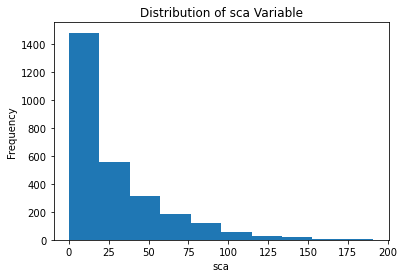

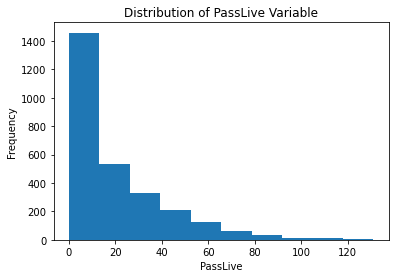

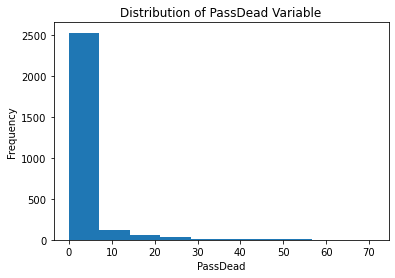

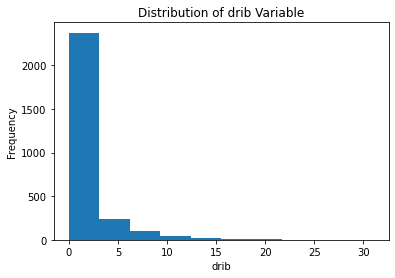

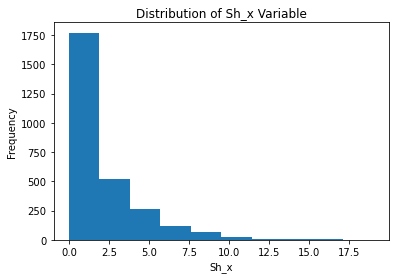

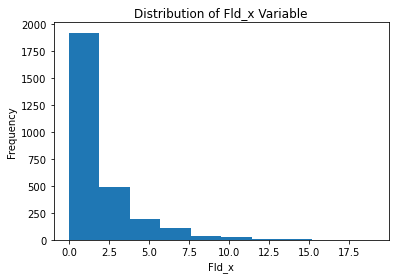

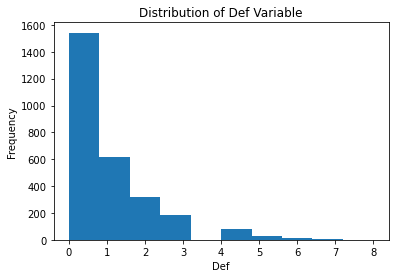

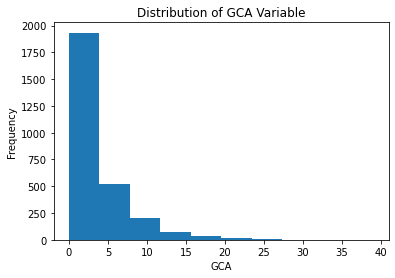

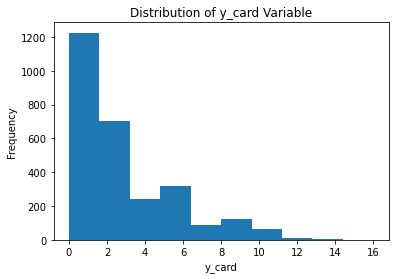

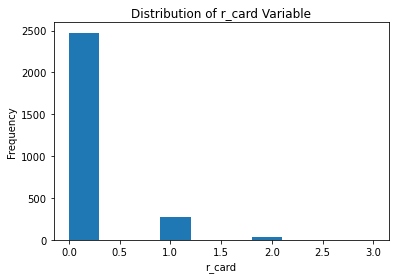

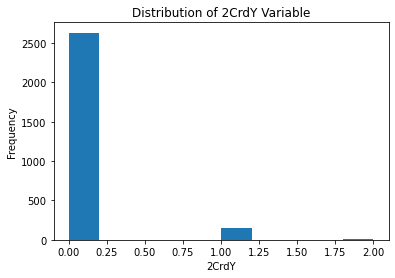

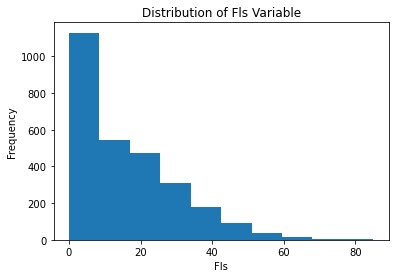

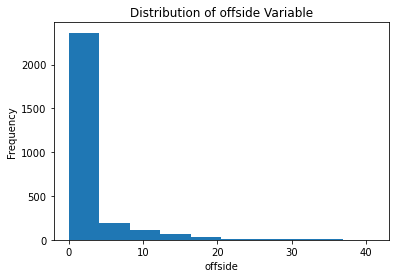

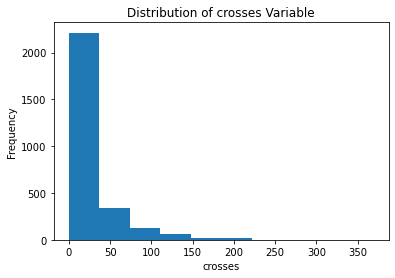

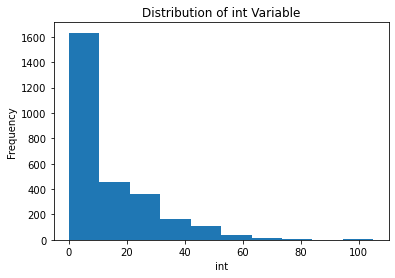

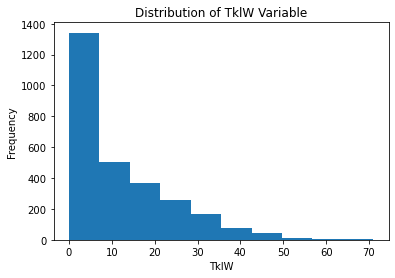

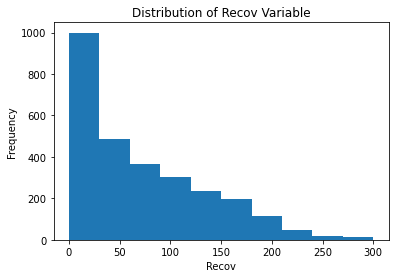

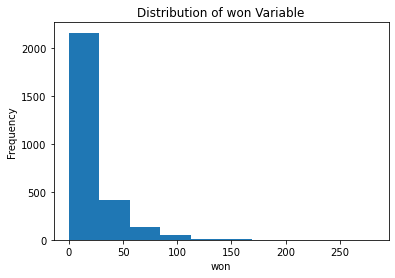

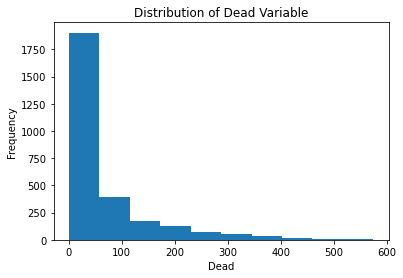

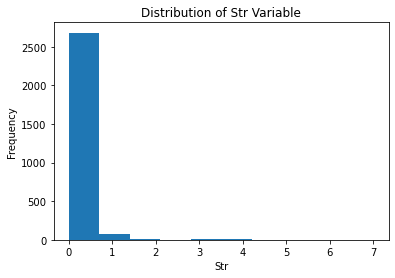

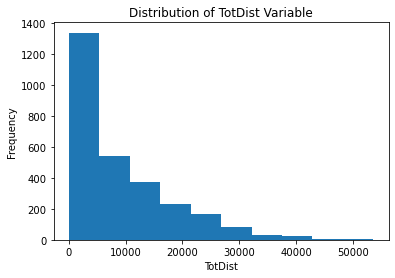

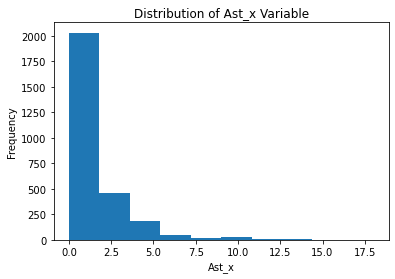

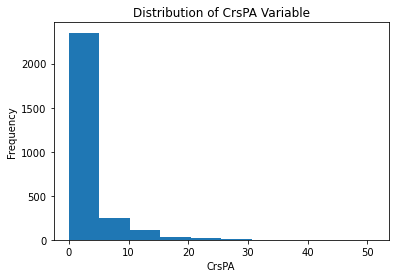

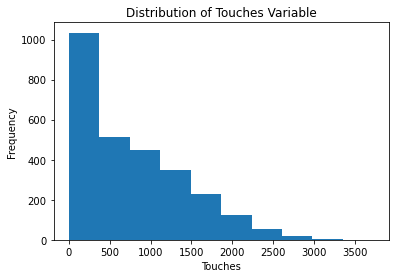

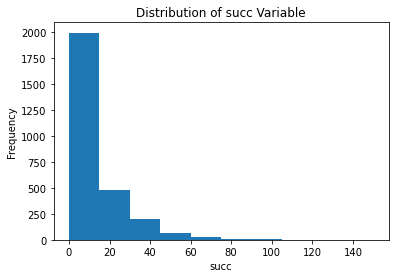

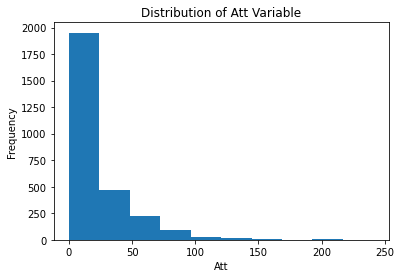

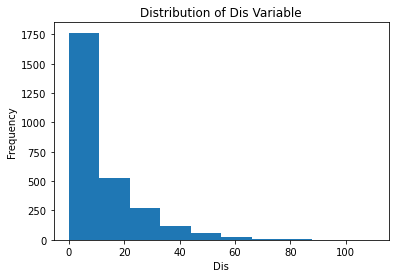

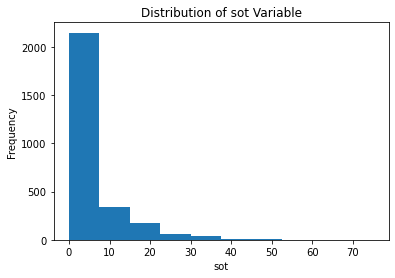

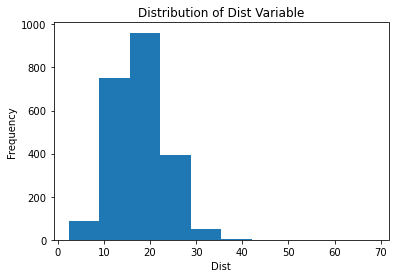

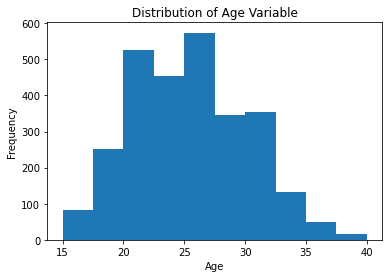

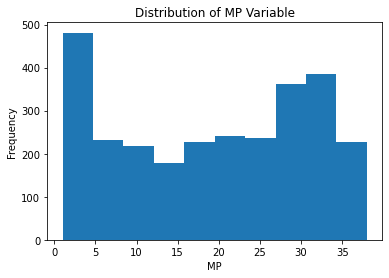

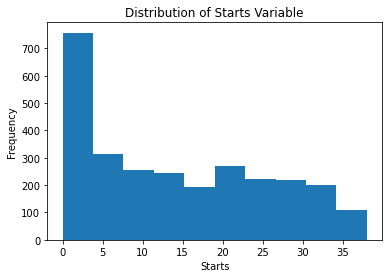

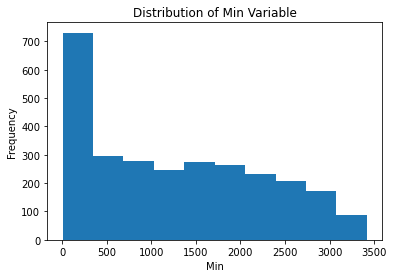

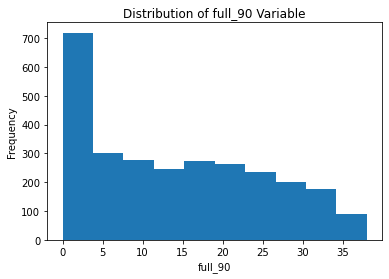

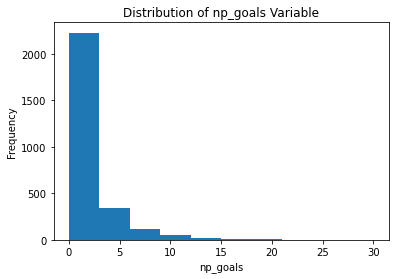

Done Graphing 


In [23]:
# Distribution of variables
graphit(df_22)

In [24]:
# Describe 
print(df_22.dtypes[:2])

Player     object
sca       float64
dtype: object


In [25]:
# Check counts of categorical Data
c_count = len(df_22['Nation'].unique())
s_count = len(df_22['Squad'].unique())
p_count = len(df_22['Pos'].unique())
l_count = len(df_22['Comp'].unique())
n_count = len(df_22['Player'].unique())

print(f'There are {c_count} unique countries, {s_count} unique clubs, {p_count} unique positions and {n_count} unique players')

There are 104 unique countries, 98 unique clubs, 11 unique positions and 2786 unique players


In [26]:
# Drop Cat Vars 
#df_22 = df_22.drop(['nation' ,'pos', 'club', 'league', 'player'], axis = 1)
#df_22 = df_22.drop(['Player', 'Pos', 'Squad', 'Nation', 'Comp'], axis = 1)
df_22 = df_22.drop(['Player'], axis = 1)

                                        
#df_22 = df_22.drop(['sca', 'succ', 'full_90', 'PassLive'], axis = 1)

In [27]:
# Outlier Cap
print('Before ', df_22['np_goals'].max())
df_22 = outlier_cap(df_22, upper_quant = .999, lower_quant = .05)
print('After ', df_22['np_goals'].max())

Before  30
Done
After  23


In [30]:
# Remove Outliers
num = df_22.select_dtypes(exclude=['object']).columns
#for x in df_22[num]:
    #print(f'Max Before:', df_22[x].max())
#    upper_limit = df_22[x].mean() + 3*df_22[x].std()
#    lower_limit = df_22[x].mean() - 3*df_22[x].std()
#    df_22[x] = np.where(df_22[x] > upper_limit, upper_limit, np.where(
#        df_22[x] < lower_limit,lower_limit, df_22[x]))
    #print(f'Max After:', df_22[x].max())
#print('****Done with outlier cap*****')

In [31]:
# NA Values
print(df_22[df_22['np_goals'] >0].isna().sum().sort_values(ascending = False)[:3])

sca         0
PassLive    0
CrsPA       0
dtype: int64


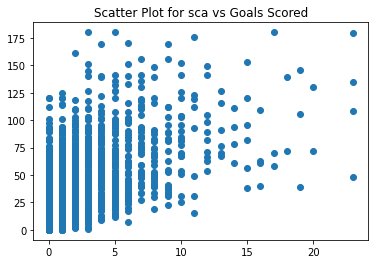

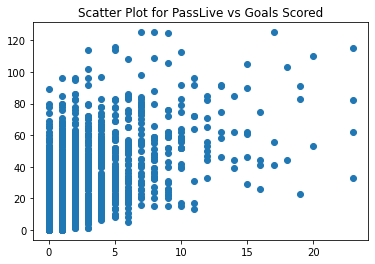

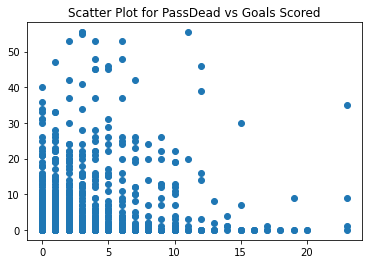

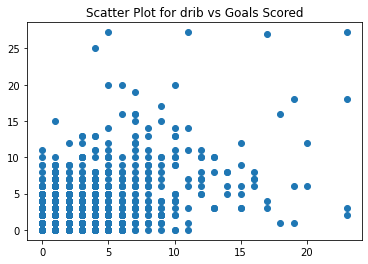

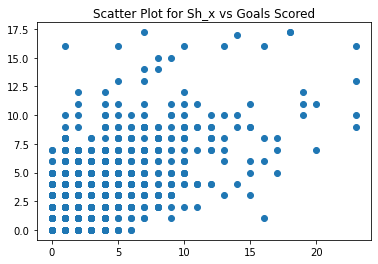

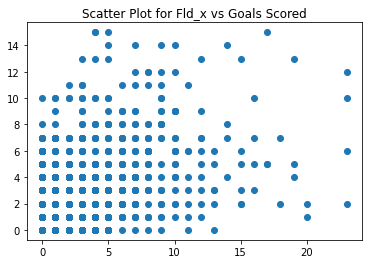

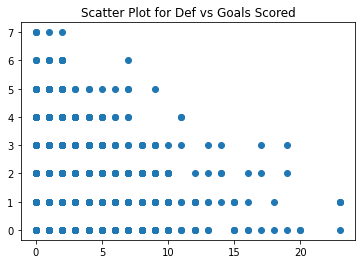

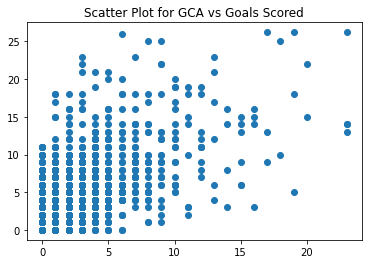

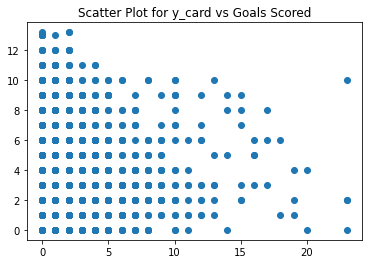

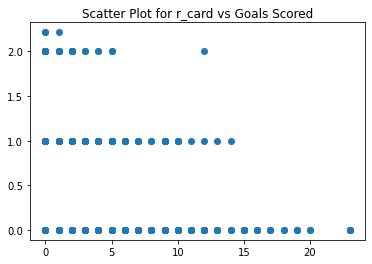

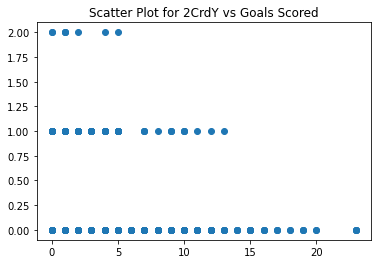

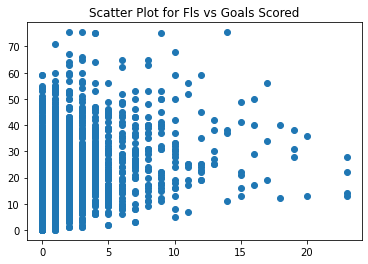

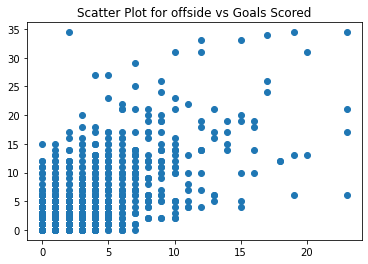

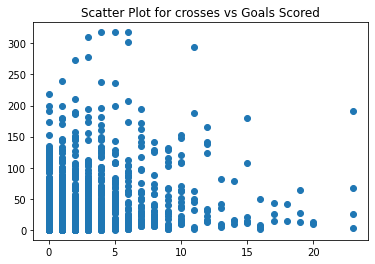

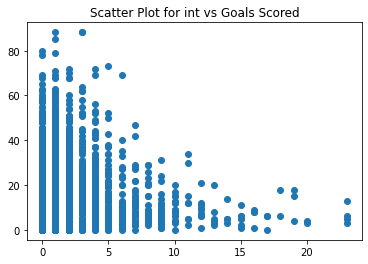

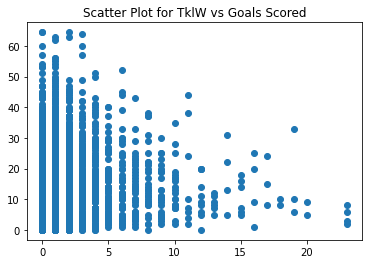

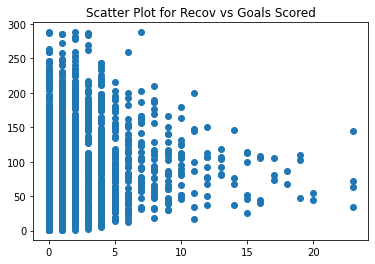

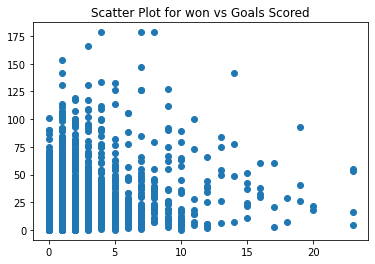

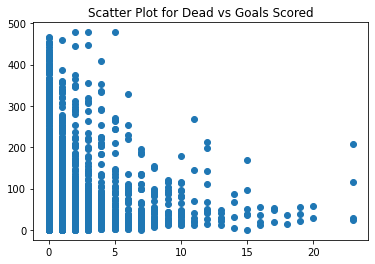

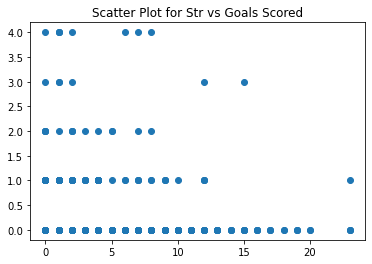

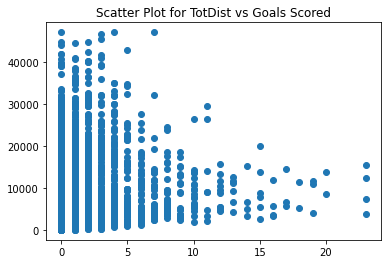

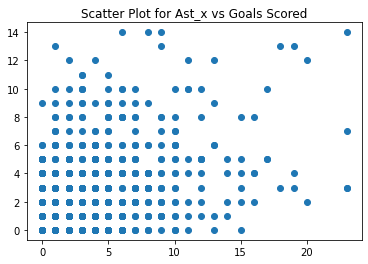

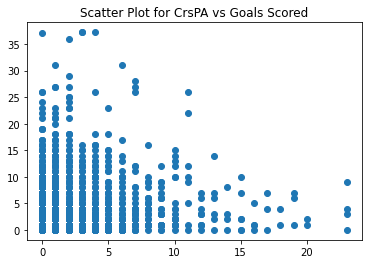

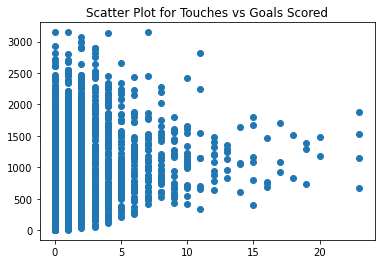

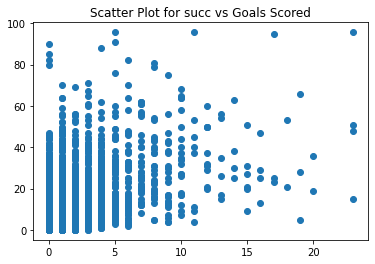

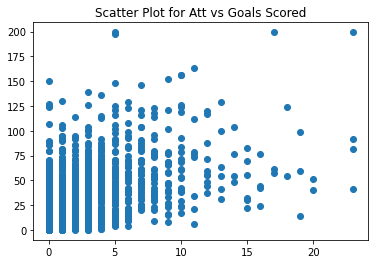

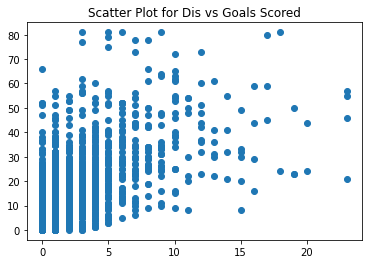

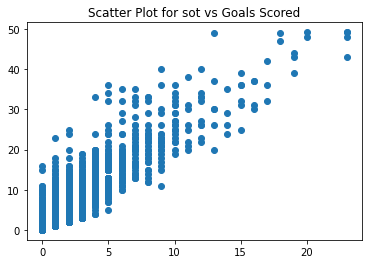

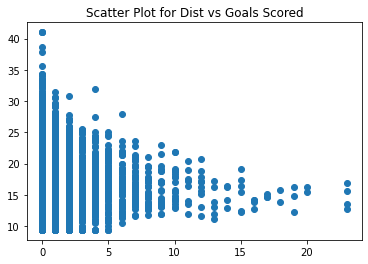

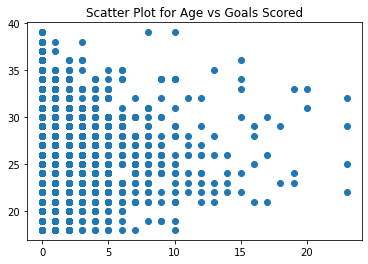

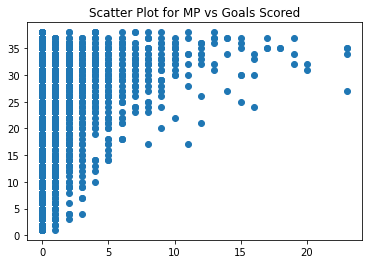

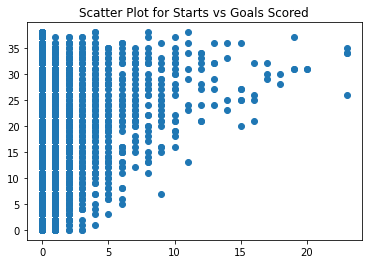

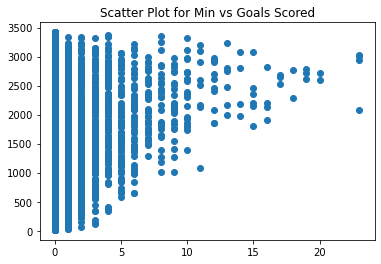

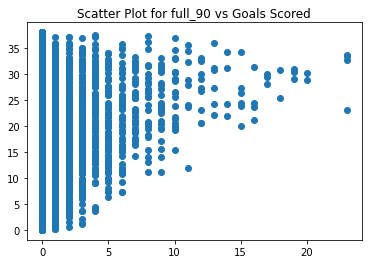

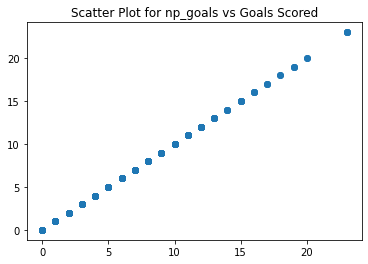

In [32]:
# Look at correlation to num vars 
# Plt for Goals
x = df_22['np_goals']
for y in df_22[num]:
    plt.scatter(x, df_22[y])
    plt.title(f'Scatter Plot for {y} vs Goals Scored')
    plt.show()

In [33]:
# Take log of data
#df_22[num] = df_22[num].applymap(lambda x: np.log(x+1))
#zscore for those that are highly skewed 

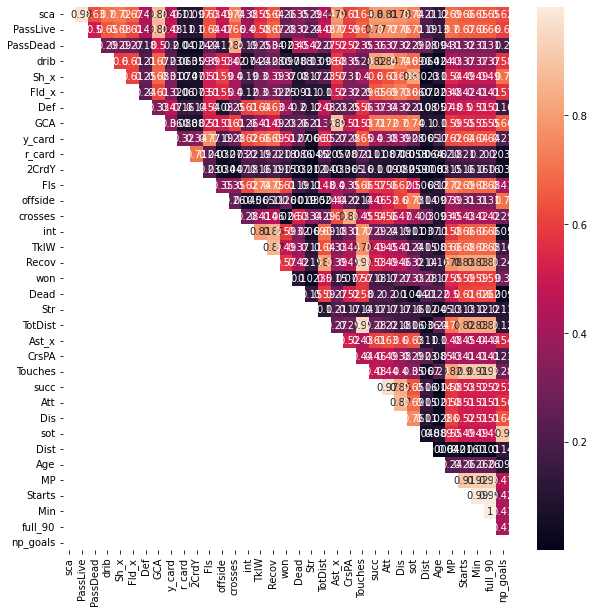

In [34]:
# Correlation Matrix
corrMatrix = df_22.corr().abs()
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))
plt.rcParams["figure.figsize"]=10,10
sns.heatmap(upper, annot=True)
plt.show()

In [35]:
# Dummy Code data
#df_22 = pd.get_dummies(df_22)
df_22.shape

(2786, 40)

In [36]:
# Save out
df_22.to_csv('22_final.csv')